# Ch.6 차원 축소(Dimention Reduction)

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

### - 공분산 순서 표준정규분포 변환

공분산 행렬

In [3]:
from sklearn.preprocessing import StandardScaler

iris_std = StandardScaler().fit_transform(iris.data)
iris_std[:3,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [4]:
iris_cov = np.dot(iris_std.T, iris_std) / len(iris_std)
iris_cov

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [5]:
iris_cov1 = np.dot(iris_std.T, iris_std) / len((iris_std) -1)
iris_cov1

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [6]:
np.cov(iris_std.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# 고유벡터 (eigenvector), 고유값(eigenvalue) 구하기

In [7]:
eig_vals, eig_vecs = np.linalg.eig(iris_cov1)

In [8]:
eig_vals

array([2.91849782, 0.91403047, 0.14675688, 0.02071484])

In [9]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [10]:
PC1 = iris_std.dot(np.reshape(eig_vecs.T[0], (4,1)))
PC2 = iris_std.dot(np.reshape(eig_vecs.T[1], (4,1)))


In [11]:
PC1

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217],
       [-2.07563095],
       [-2.44402884],
       [-2.23284716],
       [-2.33464048],
       [-2.18432817],
       [-2.1663101 ],
       [-2.32613087],
       [-2.2184509 ],
       [-2.6331007 ],
       [-2.1987406 ],
       [-2.26221453],
       [-2.2075877 ],
       [-2.19034951],
       [-1.898572  ],
       [-2.34336905],
       [-1.914323  ],
       [-2.20701284],
       [-2.7743447 ],
       [-1.81866953],
       [-2.22716331],
       [-1.95184633],
       [-2.05115137],
       [-2.16857717],
       [-2.13956345],
       [-2.26526149],
       [-2.14012214],
       [-1.83159477],
       [-2.61494794],
       [-2.44617739],
       [-2.10997488],
       [-2.2078089 ],
       [-2.04514621],
       [-2.52733191],
       [-2.42963258],
       [-2.16971071],
       [-2.28647514],
       [-1.85812246],
       [-2.5536384 ],
       [-1.96444768],
       [-2.13705901],
       [-2

In [12]:
PC2

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538],
       [-1.48917752],
       [-0.0476442 ],
       [-0.22314807],
       [ 1.11532768],
       [ 0.46901356],
       [-1.04369065],
       [-0.13307834],
       [ 0.72867617],
       [ 0.96150673],
       [-1.86005711],
       [-2.68628449],
       [-1.48360936],
       [-0.48883832],
       [-1.40501879],
       [-1.12784938],
       [-0.40885571],
       [-0.92412143],
       [-0.45834367],
       [-0.08555853],
       [-0.13725446],
       [ 0.62561859],
       [-0.24216355],
       [-0.52714953],
       [-0.31321781],
       [ 0.3377319 ],
       [ 0.50454069],
       [-0.42369507],
       [-1.79357586],
       [-2.15072788],
       [ 0.46020184],
       [ 0.2061074 ],
       [-0.66155811],
       [-0.59229277],
       [ 0.90418004],
       [-0.26887896],
       [-0.44171539],
       [ 2.33741516],
       [ 0.47910069],
       [-0.47232667],
       [-1.14222926],
       [ 0

PCA 변환

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit() 과 transform()을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_std)
iris_pca = pca.transform(iris_std)
print(iris_pca.shape)

(150, 2)


In [14]:
iris_pca[:3,:]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802]])

# 6.2 PCA(Principal Component Analysis)
#### p.382 ~ 383

In [15]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
#넘파이 데이터 세트를 판다스 Dataframe으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data, columns= columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


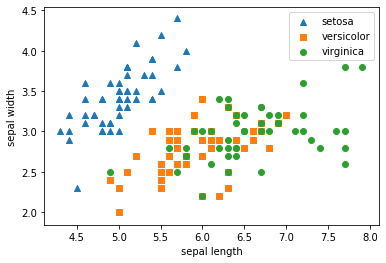

In [16]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's','o']

#setora의 target 값은 0, versicolor는 1, verginica는 2. 각 target 별로 다른 모양으로 산점도로 표시
for i , marker in enumerate(markers):
     x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
     y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
     plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

#Target 값을 제외한 속성 값을 StadardScaler를 이용해 표준 정규 분포를 가지는 값들로변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

#fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [19]:
# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1 , pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


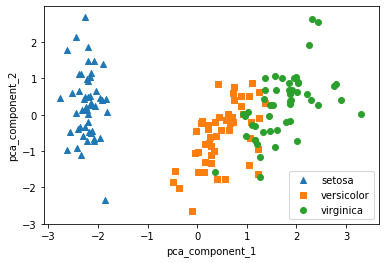

In [20]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's','o']

#pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i , marker in enumerate(markers):
     x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
     y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
     plt.scatter(x_axis_data, y_axis_data, marker=marker, label = iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [21]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rfc = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rfc, iris.data, iris.target, scoring='accuracy', cv = 3)
print('원본 데이터 교차 검증 개별 정확도 : ', scores)
print('원본 데이터 정확도 : ', np.mean(scores))


원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 정확도 :  0.96


In [23]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rfc, pca_X , iris.target, scoring= 'accuracy', cv = 3)

print('원본 데이터 교차 검증 개별 정확도 : ', scores_pca)
print('원본 데이터 정확도 : ', np.mean(scores_pca))


원본 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
원본 데이터 정확도 :  0.88


# K-평균을 이용한 붓꽃 데이터 세트 군집화

In [29]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
#더 편리한 데이터 핸들링을 위해 DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = columns)
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [30]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [31]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [38]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformd = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformd[:,0]
irisDF['pca_y'] = pca_transformd[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


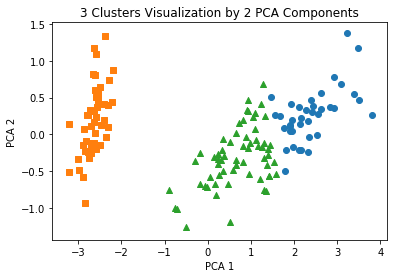

In [43]:
#군집 값이 0,1,2인 경우마다 별도으 ㅣ인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

#군집 값이 0,1,2에 해당하느 ㄴ인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker = 'o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker = 's')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker = '^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()


# 군집화 알고리즘 테스트를 위한 데이터 생성

p.415~

In [44]:
import numpy as np
import matplotlib .pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features= 2, centers=3, cluster_std= 0.8, random_state= 0)
print(X.shape, y.shape)

#y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [46]:
import pandas as pd
clusterDF = pd.DataFrame(data = X, columns = ['ftr1','ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


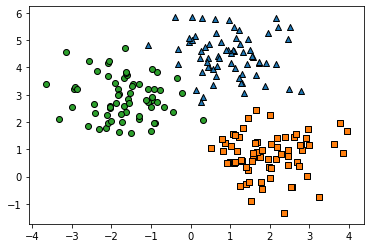

In [50]:
target_list  = np.unique(y)
#각 타깃별 산점도의 마커 값.
marker = ['o','s','^','P','D','H','x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0,1,2]
#target==0, target==1, target==2 로 scatter plot을 marker별로 생성. 
for target in target_list:
    target_cluster = clusterDF[clusterDF['target']==target]
    plt.scatter(x=target_cluster['ftr1'], y= target_cluster['ftr2'], edgecolor = 'k', marker = markers[target])
plt.show()

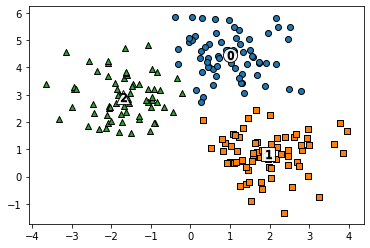

In [56]:
#KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter= 200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o','s','^','P','D','H','x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y = label_cluster['ftr2'], edgecolor='k', marker = markers[label])
    
    
    #군집별 중심 위치 좌표 시각화
    plt.scatter(x= center_x_y[0], y= center_x_y[1], s= 200, color = 'white', alpha = 0.9, edgecolor = 'k', marker= markers[label])
    plt.scatter(x= center_x_y[0], y= center_x_y[1], s= 70 , color = 'k', edgecolor = 'k', marker= '$%d$' % label)

plt.show()



In [57]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


MECE : Mutually Exclusive, Collectively Exhaustive

p. 421

In [58]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [64]:
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter= 300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [65]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

# DBSCAN 적용하기 - 붓꽃 데이터 세트 

In [66]:
from sklearn.cluster import DBSCAN


In [68]:
dbscan = DBSCAN(eps = 0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [71]:
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64
